In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Import libraries required to perform testing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

Reead the CSV file

In [ ]:
file_path = 'drive/MyDrive/ColabNotebooks/HDFS_100k.log_structured.csv'  # Replace 'path_to_your_file.csv' with the actual file path
log_data = pd.read_csv(file_path)

Display the first few rows of the log data

In [ ]:
print(log_data.head())

   LineId   Date    Time  Pid Level                     Component  \
0       1  81109  203518  143  INFO      dfs.DataNode$DataXceiver   
1       2  81109  203518   35  INFO              dfs.FSNamesystem   
2       3  81109  203519  143  INFO      dfs.DataNode$DataXceiver   
3       4  81109  203519  145  INFO      dfs.DataNode$DataXceiver   
4       5  81109  203519  145  INFO  dfs.DataNode$PacketResponder   

                                             Content EventId  \
0  Receiving block blk_-1608999687919862906 src: ...      E5   
1  BLOCK* NameSystem.allocateBlock: /mnt/hadoop/m...     E22   
2  Receiving block blk_-1608999687919862906 src: ...      E5   
3  Receiving block blk_-1608999687919862906 src: ...      E5   
4  PacketResponder 1 for block blk_-1608999687919...     E11   

                                   EventTemplate  
0       Receiving block <*> src: /<*> dest: /<*>  
1            BLOCK* NameSystem.allocateBlock:<*>  
2       Receiving block <*> src: /<*> dest: /<*

Assuming 'Date' and 'Time' are in the format YYMMDD and HHMMSS respectively

In [ ]:
log_data['Timestamp'] = pd.to_datetime(log_data['Date'].astype(str) + log_data['Time'].astype(str), format='%y%m%d%H%M%S')

Drop unnecessary columns if needed

In [ ]:
log_data = log_data.drop(['LineId', 'Date', 'Time'], axis=1)

Display the updated DataFrame

In [ ]:
print(log_data.head())

   Pid Level                     Component  \
0  143  INFO      dfs.DataNode$DataXceiver   
1   35  INFO              dfs.FSNamesystem   
2  143  INFO      dfs.DataNode$DataXceiver   
3  145  INFO      dfs.DataNode$DataXceiver   
4  145  INFO  dfs.DataNode$PacketResponder   

                                             Content EventId  \
0  Receiving block blk_-1608999687919862906 src: ...      E5   
1  BLOCK* NameSystem.allocateBlock: /mnt/hadoop/m...     E22   
2  Receiving block blk_-1608999687919862906 src: ...      E5   
3  Receiving block blk_-1608999687919862906 src: ...      E5   
4  PacketResponder 1 for block blk_-1608999687919...     E11   

                                   EventTemplate           Timestamp  
0       Receiving block <*> src: /<*> dest: /<*> 1981-10-09 20:35:18  
1            BLOCK* NameSystem.allocateBlock:<*> 1981-10-09 20:35:18  
2       Receiving block <*> src: /<*> dest: /<*> 1981-10-09 20:35:19  
3       Receiving block <*> src: /<*> dest: /<*> 1981-

Grouping events by timestamp

In [ ]:
event_counts = log_data.groupby('Timestamp').size()

Plotting the number of events over time

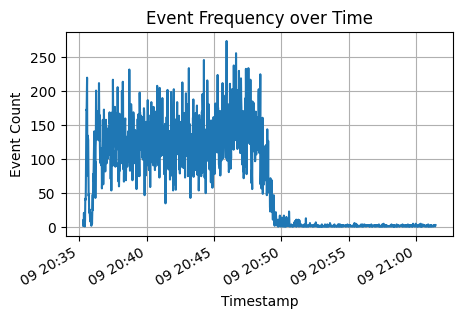

In [ ]:
plt.figure(figsize=(5, 3))
event_counts.plot()
plt.title('Event Frequency over Time')
plt.xlabel('Timestamp')
plt.ylabel('Event Count')
plt.grid(True)
plt.show()

# ---------------------------------------------
# Calculating rolling mean and standard deviation

In [ ]:
window = 30  # Choose an appropriate window size
rolling_mean = event_counts.rolling(window=window).mean()
rolling_std = event_counts.rolling(window=window).std()

Plotting the original data and rolling statistics

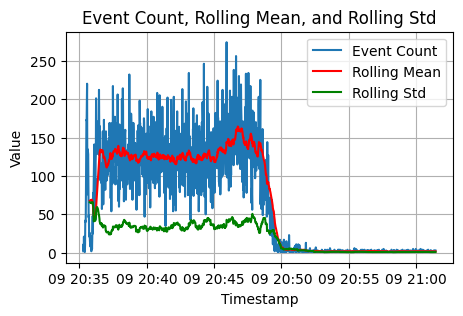

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(event_counts, label='Event Count')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title('Event Count, Rolling Mean, and Rolling Std')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Set the anomaly threshold as a factor (e.g., 2) times the rolling standard deviation

In [ ]:
anomaly_threshold = 2 * rolling_std

Detect anomalies based on the threshold

In [ ]:
anomalies = event_counts[event_counts > (rolling_mean + anomaly_threshold)]

Display detected anomalies

In [ ]:
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
Timestamp
1981-10-09 20:36:07    141
1981-10-09 20:36:15    201
1981-10-09 20:37:30    217
1981-10-09 20:37:51    206
1981-10-09 20:38:10    200
1981-10-09 20:38:14    214
1981-10-09 20:38:43    232
1981-10-09 20:39:29    198
1981-10-09 20:40:05    187
1981-10-09 20:40:47    208
1981-10-09 20:40:58    205
1981-10-09 20:41:10    190
1981-10-09 20:41:33    202
1981-10-09 20:41:49    199
1981-10-09 20:42:01    203
1981-10-09 20:42:39    213
1981-10-09 20:42:55    197
1981-10-09 20:43:08    234
1981-10-09 20:44:15    246
1981-10-09 20:44:30    216
1981-10-09 20:45:06    182
1981-10-09 20:45:16    224
1981-10-09 20:45:38    212
1981-10-09 20:45:56    274
1981-10-09 20:46:28    238
1981-10-09 20:46:38    256
1981-10-09 20:47:22    233
1981-10-09 20:47:33    234
1981-10-09 20:48:19    203
1981-10-09 20:48:26    225
1981-10-09 20:50:11     17
1981-10-09 20:50:22     15
1981-10-09 20:50:34     23
1981-10-09 20:51:15     11
1981-10-09 20:51:49     13
1981-10-09 20:52:33      

Plotting detected anomalies

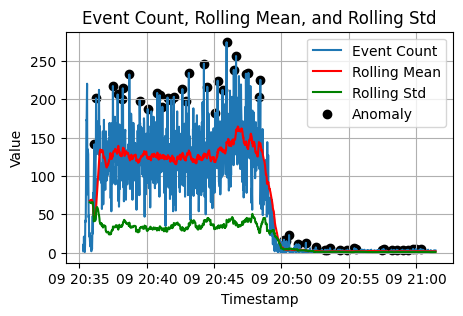

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(event_counts, label='Event Count')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.scatter(anomalies.index, anomalies, label='Anomaly', color='black')
plt.title('Event Count, Rolling Mean, and Rolling Std')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

--------------------------------------------------------------
Reshape data for Isolation Forest input

In [ ]:
X = event_counts.values.reshape(-1, 1)

Fit Isolation Forest model

In [ ]:
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
isolation_forest.fit(X)

IsolationForest(contamination=0.05)

Predict anomalies

In [ ]:
anomaly_preds = isolation_forest.predict(X)

Create a DataFrame with the event counts and anomaly predictions

In [ ]:
anomaly_df = pd.DataFrame({'EventCounts': event_counts.values.flatten(), 'AnomalyPrediction': anomaly_preds})

Identify anomalies based on predictions

In [ ]:
anomalies = anomaly_df[anomaly_df['AnomalyPrediction'] == -1]

Display detected anomalies

In [ ]:
print("Detected Anomalies using Isolation Forest:")
print(anomalies)
print("1----------------------------------------------------------")

Detected Anomalies using Isolation Forest:
     EventCounts  AnomalyPrediction
3             21                 -1
10            40                 -1
16           203                 -1
17           220                 -1
26            26                 -1
..           ...                ...
858           16                 -1
873           17                 -1
889           17                 -1
899           15                 -1
909           23                 -1

[68 rows x 2 columns]
1----------------------------------------------------------


Retrieve log entries corresponding to identified anomalies

In [ ]:
anomaly_log_entries = log_data.iloc[anomalies.index]
print("Anomaly Log Entries:")
print(anomaly_log_entries)
print("2----------------------------------------------------------")

Anomaly Log Entries:
     Pid Level                 Component  \
3    145  INFO  dfs.DataNode$DataXceiver   
10    29  INFO          dfs.FSNamesystem   
16   143  INFO  dfs.DataNode$DataXceiver   
17   143  INFO  dfs.DataNode$DataXceiver   
26   147  INFO  dfs.DataNode$DataXceiver   
..   ...   ...                       ...   
858  152  INFO  dfs.DataNode$DataXceiver   
873  153  INFO  dfs.DataNode$DataXceiver   
889  163  INFO  dfs.DataNode$DataXceiver   
899  175  INFO  dfs.DataNode$DataXceiver   
909  200  INFO  dfs.DataNode$DataXceiver   

                                               Content EventId  \
3    Receiving block blk_-1608999687919862906 src: ...      E5   
10   BLOCK* NameSystem.addStoredBlock: blockMap upd...     E26   
16   Received block blk_-1608999687919862906 src: /...      E6   
17   Receiving block blk_-1608999687919862906 src: ...      E5   
26   Receiving block blk_-1608999687919862906 src: ...      E5   
..                                                 ...

Plotting detected anomalies

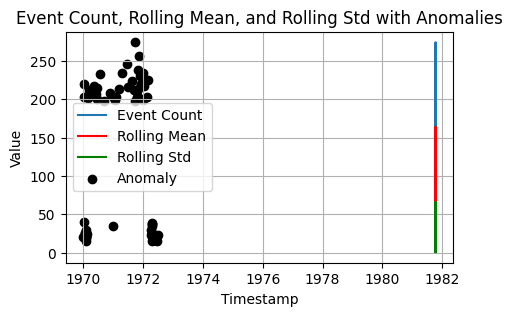

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(event_counts, label='Event Count')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.scatter(anomalies.index, event_counts.iloc[anomalies.index], color='black', label='Anomaly')
plt.title('Event Count, Rolling Mean, and Rolling Std with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()